<a href="https://colab.research.google.com/github/siyaboban/Crop-recommendation/blob/main/Crop__recommendation_code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# import libraries
import pandas as crs_pd
import numpy as crs_np

In [90]:
#read data
crs_df=crs_pd.read_csv("/content/Crop_recommendation.csv")

In [91]:
#print data
crs_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [92]:
# check info
crs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [93]:
# Check for null values in each column
crs_df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [94]:
#check for statistical properties
crs_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [95]:
#check for any duplicates values
crs_df.duplicated().sum()

0

In [96]:
#import libraries
import matplotlib.pyplot as crs_plt
import seaborn as crs_sns

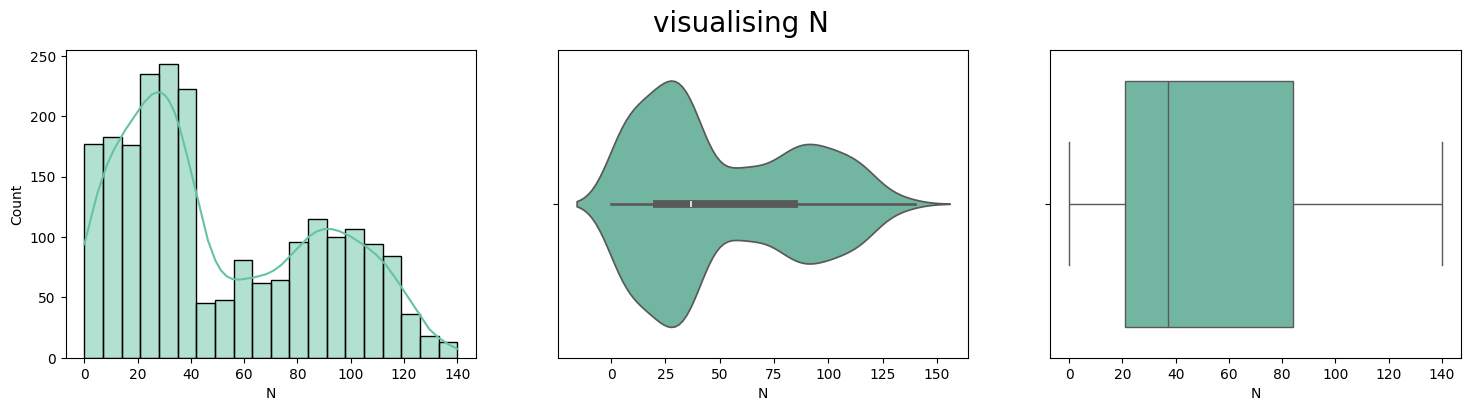

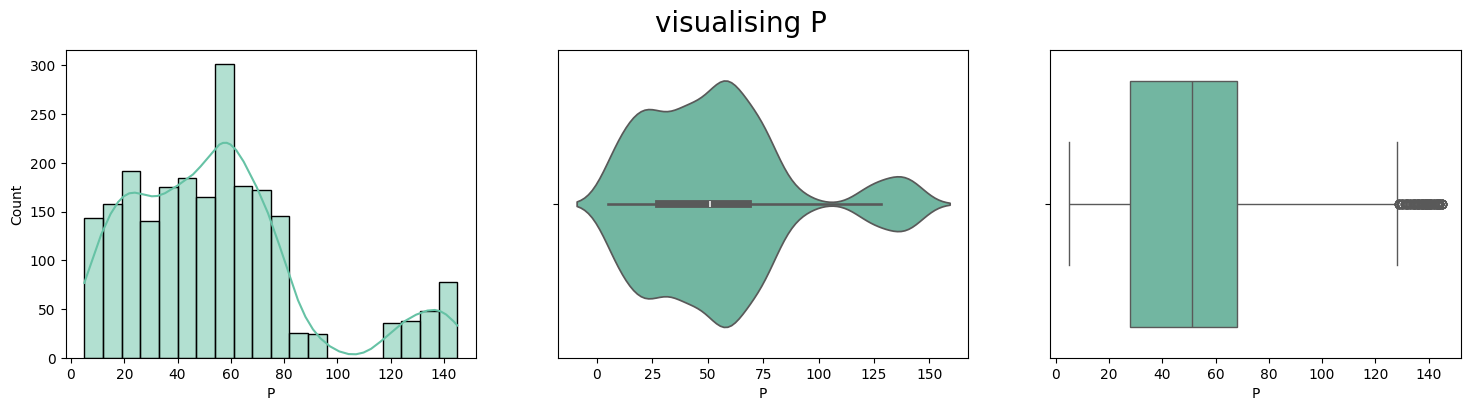

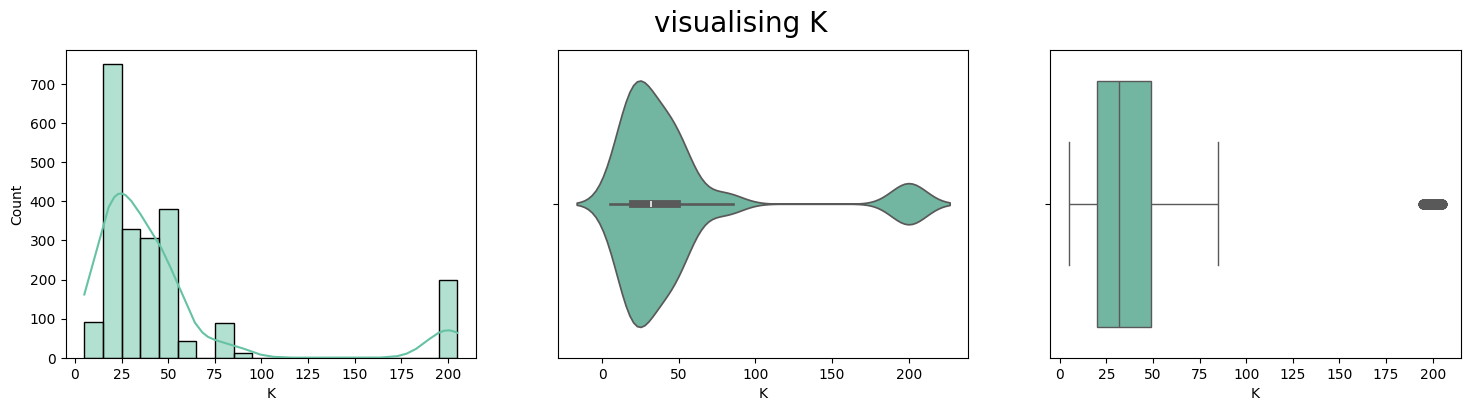

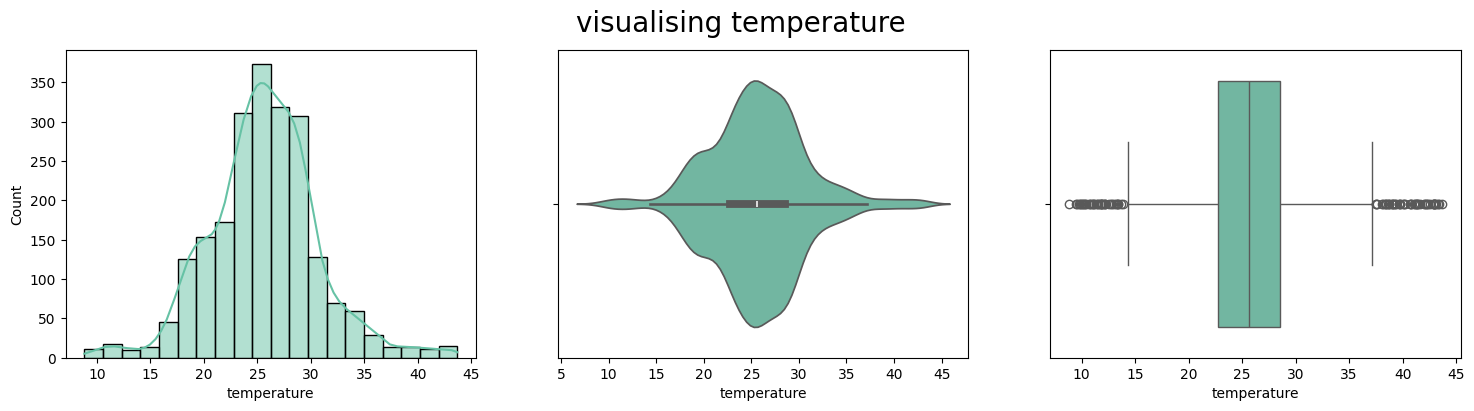

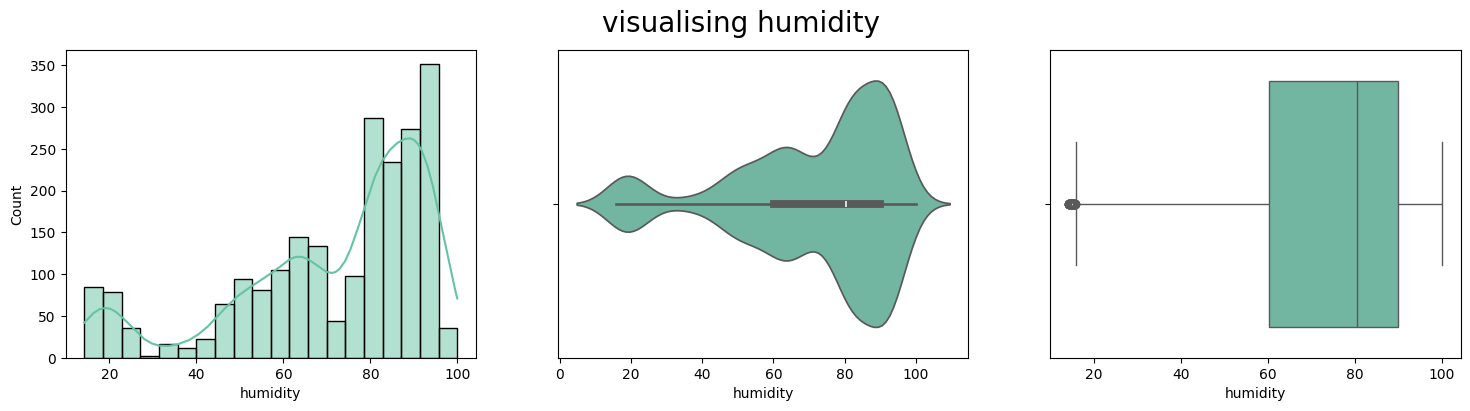

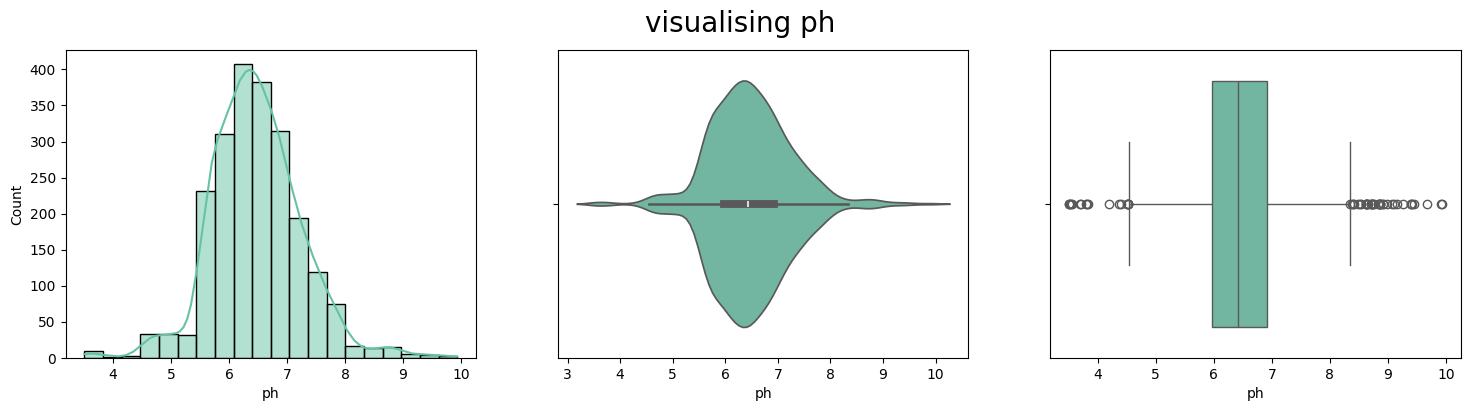

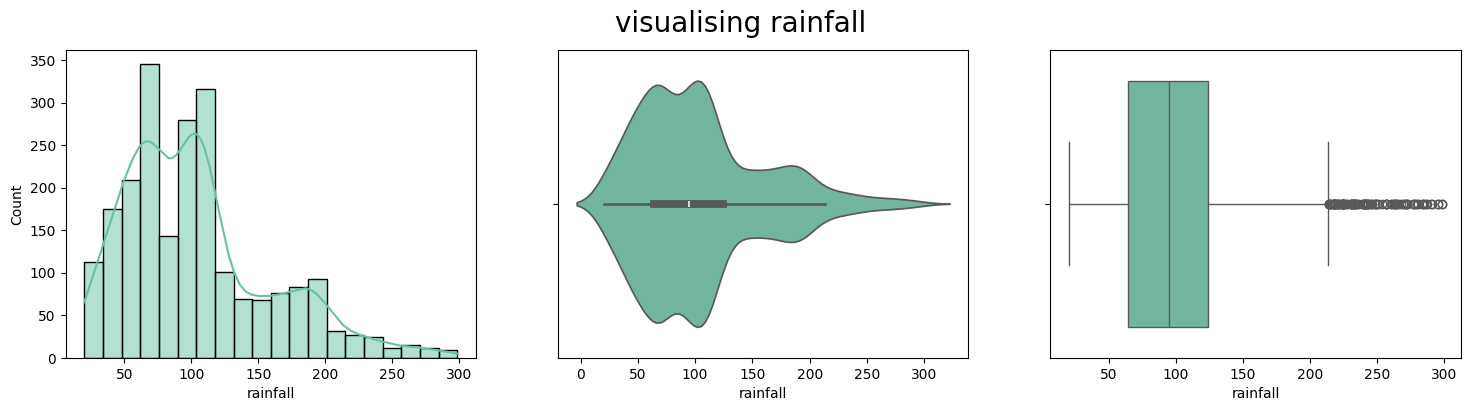

In [97]:
# performing some EDA
crs_plt.style.use('fast')
crs_sns.set_palette("Set2")
for i in crs_df.columns[:-1]:
  fig,ax=crs_plt.subplots(1,3,figsize=(18,4))
  crs_sns.histplot(data=crs_df, x=i, kde=True, bins=20,ax=ax[0])
  crs_sns.violinplot(data=crs_df, x=i,ax=ax[1])
  crs_sns.boxplot(data=crs_df, x=i, ax=ax[2])
  crs_plt.suptitle(f'visualising {i}', size=20)

In [98]:
# calculate correlation matrix
crs_corr = crs_df.drop(['label'], axis=1).corr()
crs_corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

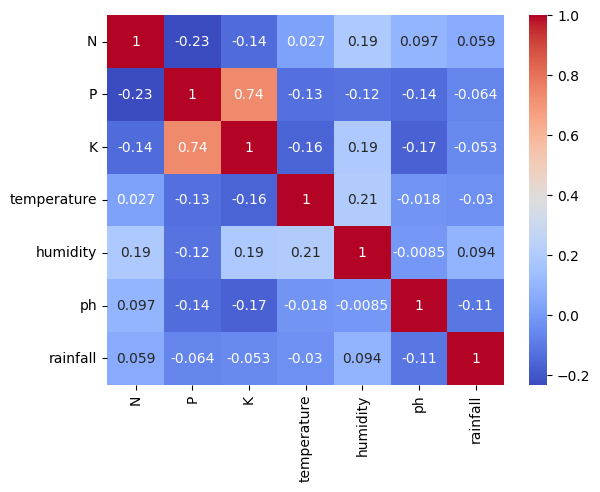

In [99]:
# plot correlation matrix
crs_sns.heatmap(crs_corr, annot= True, cbar= True, cmap= 'coolwarm')

In [100]:
# check for number of unique values
crs_df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


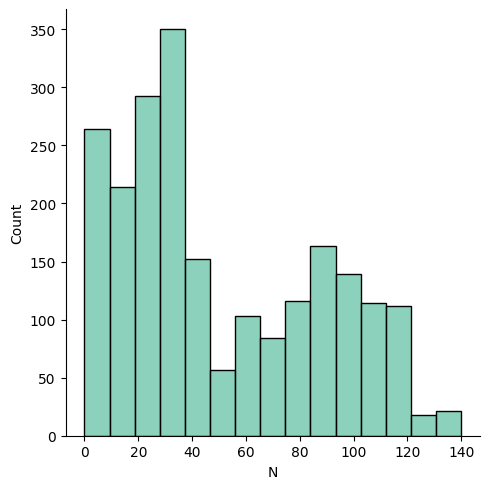

In [101]:
# distribution plot for N column
crs_sns.displot(crs_df['N'])

In [102]:
#Converting Categorical varibales to a integer format

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crs_df['crop_num']=crs_df['label'].map(crop_dict)
crs_df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [103]:
# Removing Label column from the dataset

crs_df= crs_df.drop('label', axis=1)
crs_df

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [104]:
crs_df.shape

(2200, 8)

In [105]:
crs_df.to_csv("cleaned_crs_df.csv", index = False)


**ML Model Implementation**

In [107]:
from sklearn import preprocessing as crs_pre

# Create an instance of LabelEncoder
label_encoder = crs_pre.LabelEncoder()

# Fit and transform the 'crop_num' column
crs_df['crop_num'] = label_encoder.fit_transform(crs_df['crop_num'])


In [108]:
# Seperating input variables and target variables
crs_Ip = crs_df.drop('crop_num',axis=1)
crs_Op = crs_df['crop_num']

In [109]:
from sklearn.model_selection import train_test_split as crs_split

crs_Xtrain, crs_Xtest, crs_Ytrain, crs_Ytest = crs_split(crs_Ip, crs_Op, test_size=0.2, random_state= 30)
crs_Xval, crs_Xtest, crs_Yval, crs_Ytest = crs_split(crs_Xtest, crs_Ytest, test_size= 0.5, random_state= 30)

In [110]:
print("\nTraining Shape    :", crs_Xtrain.shape)
print("\nValidation Shape  :", crs_Xval.shape)
print("\nTesting Shape     :", crs_Xtest.shape)


Training Shape    : (1760, 7)

Validation Shape  : (220, 7)

Testing Shape     : (220, 7)


In [111]:
from sklearn.metrics import confusion_matrix as crs_confusM
from sklearn.metrics import ConfusionMatrixDisplay as crs_disp
from sklearn.metrics import classification_report as crs_rep
from sklearn import metrics as crs_Mt
import matplotlib.pyplot as crs_plt
import time as crs_time
import warnings as crs_wgs
crs_wgs.filterwarnings("ignore")

### **Random Forest Classifier**


In [112]:
from sklearn.ensemble import RandomForestClassifier as crs_rf
from sklearn.model_selection import RandomizedSearchCV as crs_rsv
parameters = {'n_estimators': [20, 40, 80, 100],
                   'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_depth': [3, 7, 9, 12]}


# Initialize the RandomForestClassifier
model = crs_rf(random_state= 40)

# Initialize RandomizedSearchCV with the model and parameters
random_search = crs_rsv(model, parameters, cv=2, verbose=10)

# Fit the RandomizedSearchCV object to the data
random_search.fit(crs_Xtrain,crs_Ytrain)

print("\nRandom Forest Parameters selected by Random Search :")
print(random_search.best_params_)
print("\nRandom Forest Score: ", random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=entropy, max_depth=9, n_estimators=40............
[CV 1/2; 1/10] END criterion=entropy, max_depth=9, n_estimators=40;, score=0.994 total time=   0.2s
[CV 2/2; 1/10] START criterion=entropy, max_depth=9, n_estimators=40............
[CV 2/2; 1/10] END criterion=entropy, max_depth=9, n_estimators=40;, score=0.989 total time=   0.2s
[CV 1/2; 2/10] START criterion=gini, max_depth=12, n_estimators=100.............
[CV 1/2; 2/10] END criterion=gini, max_depth=12, n_estimators=100;, score=0.994 total time=   0.4s
[CV 2/2; 2/10] START criterion=gini, max_depth=12, n_estimators=100.............
[CV 2/2; 2/10] END criterion=gini, max_depth=12, n_estimators=100;, score=0.991 total time=   0.4s
[CV 1/2; 3/10] START criterion=log_loss, max_depth=9, n_estimators=40...........
[CV 1/2; 3/10] END criterion=log_loss, max_depth=9, n_estimators=40;, score=0.994 total time=   0.2s
[CV 2/2; 3/10] START criterion=log_

Training Process : 0.2445836067199707 Seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         9
          16       1.00      1.00 

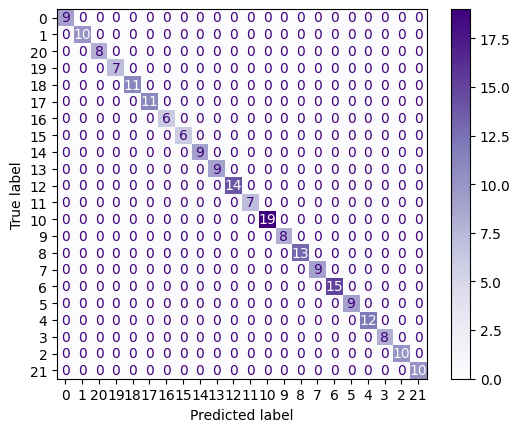

In [113]:
# Training Process
time1 = crs_time.time()
model = crs_rf(**random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval,y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         5
          17       1.00    

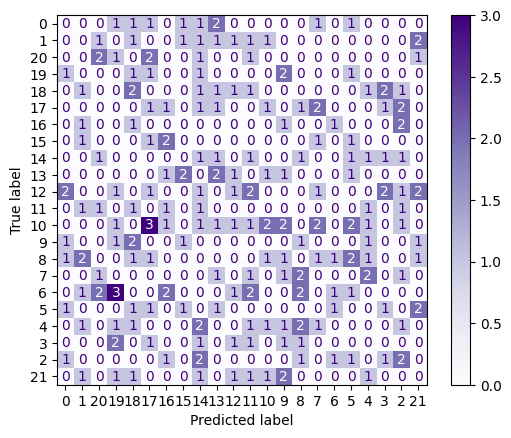

In [114]:
# Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Decision Tree Classifier**

In [115]:
from sklearn.tree import DecisionTreeClassifier as crs_dt

# Initialize the DecisionTreeClassifier
dt_model = crs_dt(random_state=40)

# Define the parameters for RandomizedSearchCV for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with the Decision Tree model and parameters
dt_random_search = crs_rsv(dt_model, dt_params, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
dt_random_search.fit(crs_Xtrain,crs_Ytrain)

print("\nDecision Tree Parameters selected by Randomized Search:")
print(dt_random_search.best_params_)
print("\nDecision Tree Score: ", dt_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree Parameters selected by Randomized Search:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Decision Tree Score:  0.9159090909090908


Training Process : 0.08037948608398438 Seconds

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       0.75      0.90      0.82        10
           2       1.00      0.38      0.55         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         8
          14       1.00      0.85      0.92        13
          15       0.69      1.00      0.82         9
          16       1.00      1.00

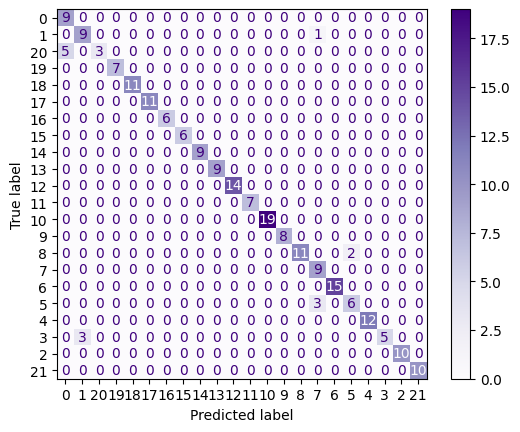

In [117]:
# Training Process
time1 = crs_time.time()
model = crs_dt(**dt_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pdct))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.75      1.00      0.86         9
           2       1.00      0.50      0.67         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       0.94      1.00      0.97        16
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        12
          14       0.88      0.64      0.74        11
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         5
          17       0.69    

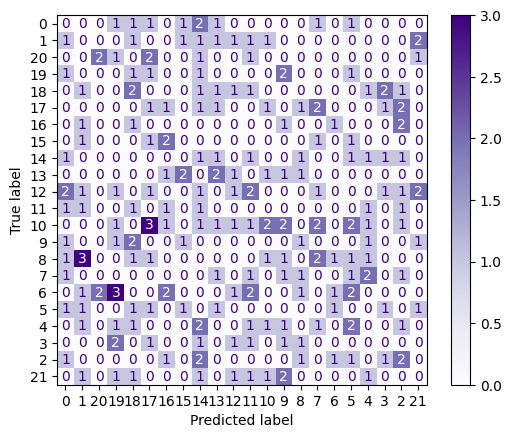

In [119]:
# Testing Process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pdct))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Support Vector Classifier**

In [120]:
from sklearn.svm import SVC as crs_svc

# Initialize the SVM classifier
svm_model = crs_svc(random_state=40)

# Define the parameters for GridSearchCV for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with the SVM model and parameters
svm_grid_search = crs_rsv(svm_model, svm_params, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
svm_grid_search.fit(crs_Xtrain, crs_Ytrain)

print("\nSVM Parameters selected by Random Search:")
print(svm_grid_search.best_params_)
print("\nSVM Score: ", svm_grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

SVM Parameters selected by Random Search:
{'kernel': 'linear', 'gamma': 'scale', 'C': 10}

SVM Score:  0.984659090909091


Training Process : 0.10946536064147949 Seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         9
          16       1.00      1.00

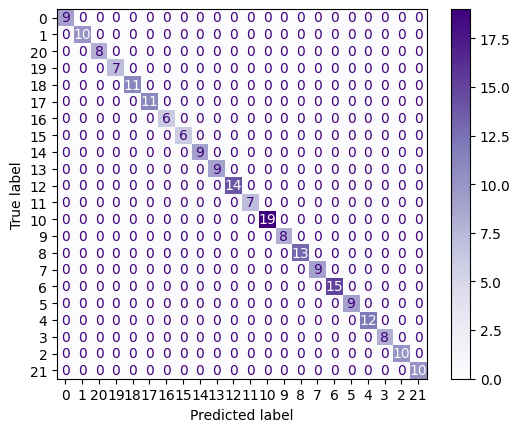

In [121]:
# Training Process
time1 = crs_time.time()
model = crs_svc(**svm_grid_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         9
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         5
          17       1.00    

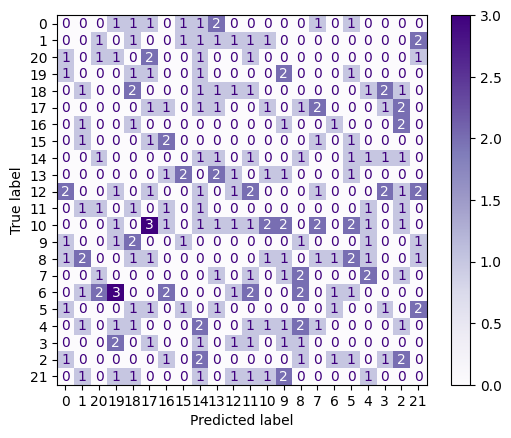

In [122]:
# Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **KNN Implementation**


In [32]:
from sklearn.neighbors import KNeighborsClassifier as crs_knn

# Initialize the KNN classifier
knn_model = crs_knn()

# Define the parameters for RandomizedSearchCV for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV with the KNN model and parameters
knn_random_search = crs_rsv(knn_model, knn_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
knn_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nKNN Parameters selected by Randomized Search:")
print(knn_random_search.best_params_)
print("\nKNN Score: ", knn_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Parameters selected by Randomized Search:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}

KNN Score:  0.9829545454545453


Training Process : 0.009087562561035156 Seconds

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.90      0.95        10
           3       0.89      1.00      0.94         8
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.0

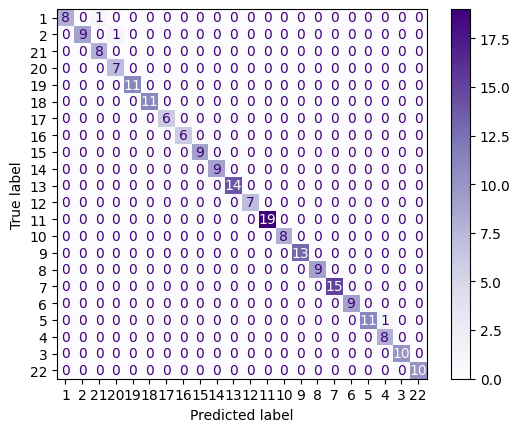

In [33]:
# Training Process
time1 = crs_time.time()
model = crs_knn(**knn_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00        12
           5       0.18      0.15      0.17        13
           6       0.09      0.08      0.08        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         6
           9       0.11      0.06      0.08        16
          10       0.22      0.18      0.20        11
          11       0.07      0.12      0.09         8
          12       0.00      0.00      0.00        13
          13       0.11      0.25      0.15         8
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         9
          17       0.07      0.20      0.10         5
          18       0.00    

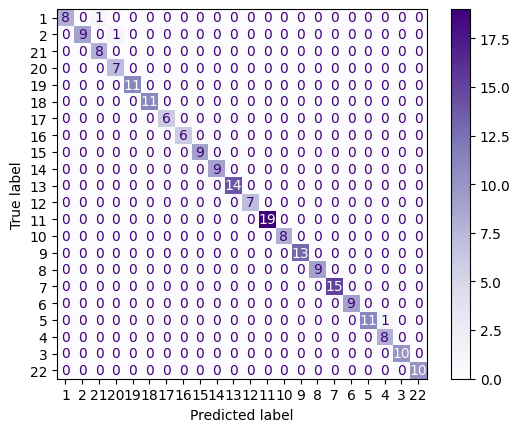

In [34]:
# Testing Process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### ***BOOSTING ALGORITHMS***

### **XGBoost Implementation**

In [35]:
!pip install xgboost

In [36]:
import xgboost as crs_xgb

In [37]:
# Define the parameters for RandomizedSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Assuming Ytrain is a pandas Series, adjust labels to start from 0
crs_Ytrain = crs_Ytrain - 1

# Remove instances with class 22 if they are not relevant
crs_Ytrain = crs_Ytrain[crs_Ytrain != 21] # 21 is the new label for class 22 after adjustment

# Re-index the data after removing instances
crs_Xtrain = crs_Xtrain.loc[crs_Ytrain.index]

# Initialize the XGBoost classifier
xgb_model = crs_xgb.XGBClassifier(random_state=40, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV with the model and parameters
# n_iter controls the number of random combinations to try
xgb_random_search = crs_rsv(xgb_model, xgb_params, n_iter=10, cv=2, verbose=10, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
xgb_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nXGBoost Parameters selected by Randomized Search:")
print(xgb_random_search.best_params_)
print("\nXGBoost Score: ", xgb_random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits

XGBoost Parameters selected by Randomized Search:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

XGBoost Score:  0.9916595720528975


Training Process : 6.723313093185425 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00      11.0
           6       0.00      0.00      0.00      11.0
           7       0.00      0.00      0.00       6.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00       9.0
          10       0.00      0.00      0.00       9.0
          11       0.00      0.00      0.00      14.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00      19.0
          14       0.00      0.00      0.00       8.0
          15       0.00      0.00      0.00      13.0
          16       0.00      0.00  

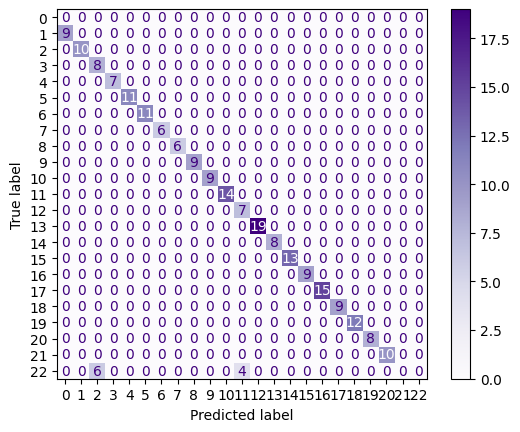

In [38]:
# Training Process
time1 = crs_time.time()
model = crs_xgb.XGBClassifier(**xgb_random_search.best_params_)
model.fit(crs_Xtrain,crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         7
           2       0.07      0.11      0.09         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        13
           7       0.33      0.22      0.27         9
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        11
          11       0.09      0.12      0.11         8
          12       0.05      0.08      0.06        13
          13       0.00      0.00      0.00         8
          14       0.08      0.08      0.08        12
          15       0.22      0.18      0.20        11
          16       0.00      0.00      0.00         9
          17       0.11    

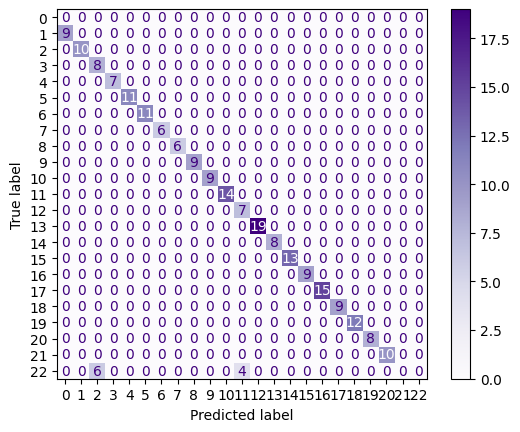

In [39]:
# Testing Process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Light GBM**

In [40]:
!pip install lightgbm

In [41]:
import lightgbm as crs_lgb

In [42]:
# Initialize the LightGBM classifier
lgb_model = crs_lgb.LGBMClassifier(random_state=40)

# Define the parameters for RandomizedSearchCV for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize RandomizedSearchCV with the LightGBM model and parameters
lgb_random_search = crs_rsv(lgb_model, lgb_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
lgb_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nLightGBM Parameters selected by Randomized Search:")
print(lgb_random_search.best_params_)
print("\nLightGBM Score: ", lgb_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[Lig

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] 

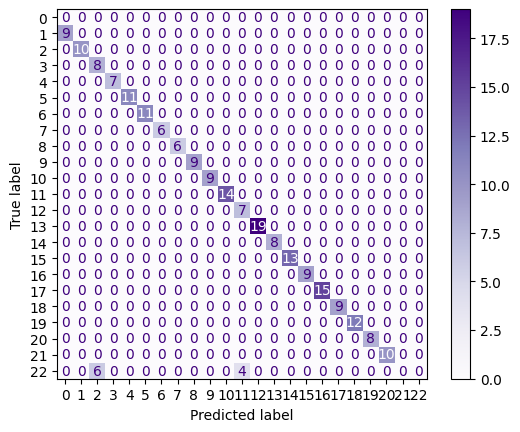

In [43]:
# Training Process
time1 = crs_time.time()
model = crs_lgb.LGBMClassifier(**lgb_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

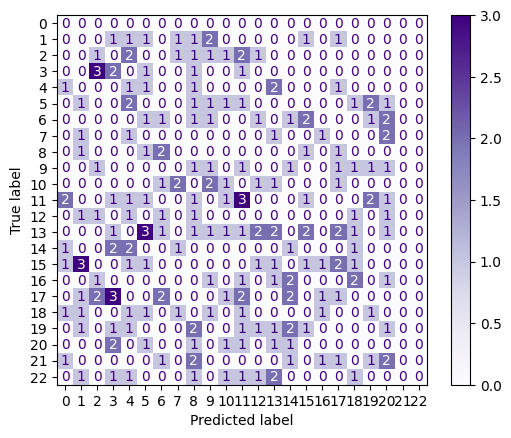

In [45]:
# Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Catboost**

In [46]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostClassifier as crs_cat

# Initialize the CatBoost classifier
catboost_model = crs_cat(random_state=40, verbose=0)  # Suppress verbose output during training

# Define the parameters for RandomizedSearchCV for CatBoost
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Initialize RandomizedSearchCV with the CatBoost model and parameters
catboost_random_search = crs_rsv(catboost_model, catboost_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
catboost_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nCatBoost Parameters selected by Randomized Search:")
print(catboost_random_search.best_params_)
print("\nCatBoost Score: ", catboost_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

CatBoost Parameters selected by Randomized Search:
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 3}

CatBoost Score:  0.9928518123667377


0:	learn: 2.8363326	total: 12.6ms	remaining: 2.51s
1:	learn: 2.6420603	total: 19.9ms	remaining: 1.97s
2:	learn: 2.4921504	total: 27.3ms	remaining: 1.79s
3:	learn: 2.3454367	total: 35ms	remaining: 1.72s
4:	learn: 2.2573671	total: 45.8ms	remaining: 1.78s
5:	learn: 2.1404420	total: 55.2ms	remaining: 1.78s
6:	learn: 2.0505432	total: 65.3ms	remaining: 1.8s
7:	learn: 1.9451618	total: 74.3ms	remaining: 1.78s
8:	learn: 1.8649054	total: 86ms	remaining: 1.82s
9:	learn: 1.8181254	total: 92.6ms	remaining: 1.76s
10:	learn: 1.7538761	total: 99.5ms	remaining: 1.71s
11:	learn: 1.6780564	total: 108ms	remaining: 1.7s
12:	learn: 1.6039326	total: 116ms	remaining: 1.67s
13:	learn: 1.5372333	total: 125ms	remaining: 1.66s
14:	learn: 1.4829676	total: 131ms	remaining: 1.62s
15:	learn: 1.4438492	total: 138ms	remaining: 1.59s
16:	learn: 1.4004968	total: 146ms	remaining: 1.57s
17:	learn: 1.3515871	total: 153ms	remaining: 1.55s
18:	learn: 1.2908991	total: 159ms	remaining: 1.52s
19:	learn: 1.2389902	total: 166ms	re

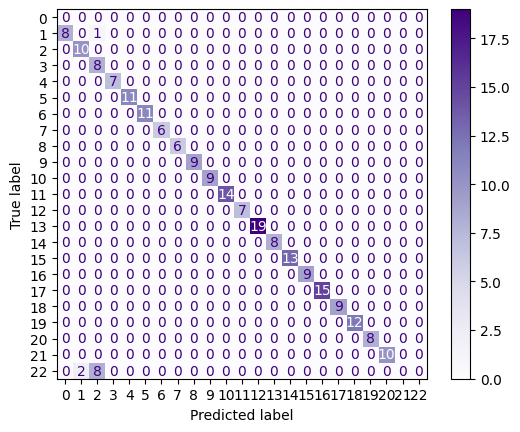

In [48]:
# Training Process
time1 = crs_time.time()
model = crs_cat(**catboost_random_search.best_params_)
model.fit(crs_Xtrain,crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming Yval contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix =crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

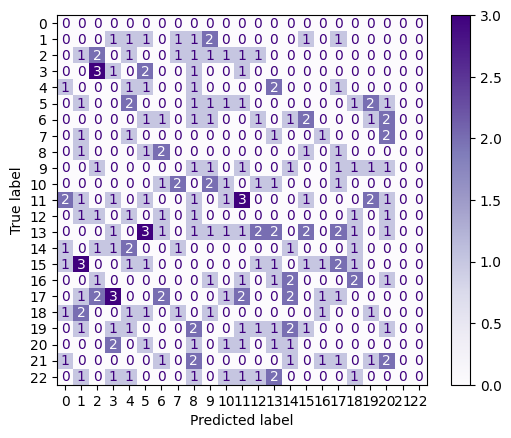

In [49]:
# Testing Process
time1 = crs_time.time()
y_pred =model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

## ***Transformer Models***

In [73]:
import pandas as crs_pd

In [74]:
crs_df = crs_pd.read_csv("cleaned_crs_df.csv")

In [75]:
crs_df

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [76]:
crs_df.shape

(2200, 8)

In [77]:
from sklearn import preprocessing as crs_pre

# Create an instance of LabelEncoder
label_encoder = crs_pre.LabelEncoder()

# Fit and transform the 'crop_num' column
crs_df['crop_num'] = label_encoder.fit_transform(crs_df['crop_num'])

In [78]:
crs_df['crop_num'].value_counts()

,count
crop_num,
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100


In [79]:
crs_Ip = crs_df.drop('crop_num',axis=1)
crs_Op = crs_df['crop_num']

In [80]:
from sklearn.model_selection import train_test_split as crs_split
crs_Xtrain, crs_Xtest, crs_Ytrain, crs_Ytest = crs_split(crs_Ip, crs_Op, test_size=0.2, random_state= 30)
crs_Xval, crs_Xtest, crs_Yval, crs_Ytest = crs_split(crs_Xtest, crs_Ytest, test_size= 0.5, random_state= 30)

In [81]:
print("\nTraining Shape    :", crs_Xtrain.shape)
print("\nValidation Shape  :", crs_Xval.shape)
print("\nTesting Shape     :", crs_Xtest.shape)


Training Shape    : (1760, 7)

Validation Shape  : (220, 7)

Testing Shape     : (220, 7)


In [82]:
import warnings as crs_wgs
crs_wgs.filterwarnings("ignore")

In [83]:
import numpy as crs_np
import tensorflow as crs_TFlow
import time as crs_time
from tensorflow.keras.layers import Reshape as crs_reshape
from tensorflow.keras.layers import Attention as crs_Attention
from tensorflow.keras.layers import Concatenate as crs_Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D as crs_GAPooling
from tensorflow.keras.models import Model as crs_Model
from tensorflow.keras.layers import Input as crs_input
from tensorflow.keras.layers import Dense as crs_dense
from sklearn.metrics import confusion_matrix as crs_confusM
from sklearn.metrics import ConfusionMatrixDisplay as crs_disp
from sklearn.metrics import classification_report as crs_rep
import matplotlib.pyplot as crs_plt

In [84]:
crop_cn = len(crs_Op.unique())
crop_cn

22

### **Transformer model with Adam Optimizer**

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.0435 - loss: 136.3154 - val_accuracy: 0.0636 - val_loss: 111.3072
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0438 - loss: 122.8847 - val_accuracy: 0.0545 - val_loss: 198.7043
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0436 - loss: 217.7894 - val_accuracy: 0.0409 - val_loss: 370.7224
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0360 - loss: 400.0641 - val_accuracy: 0.0500 - val_loss: 579.3865
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0475 - loss: 582.2539 - val_accuracy: 0.0455 - val_loss: 684.4206
Training Process : 1.4773142337799072 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Process : 0.24137210845947266 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
        

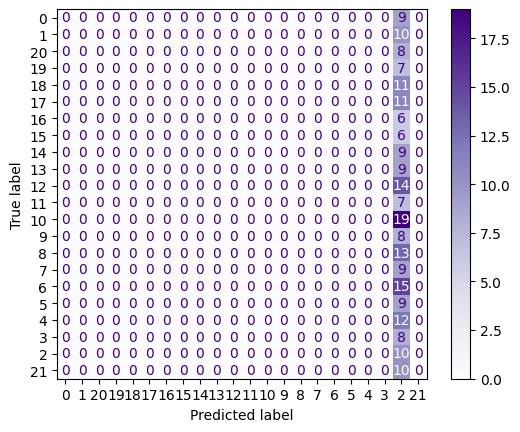

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Testing Process : 0.18710851669311523 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       

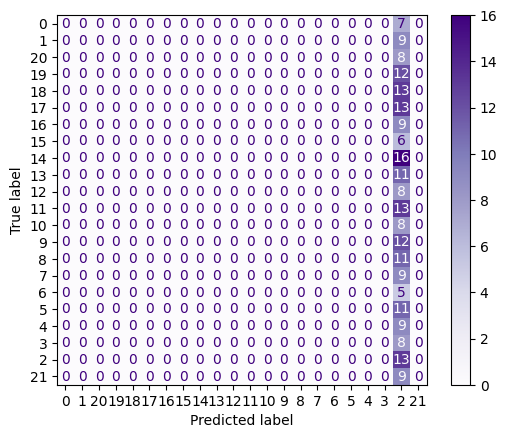

In [85]:
from tensorflow.keras.optimizers import Adam as crs_adam

crs_time1 = crs_time.time()

inp_layer = crs_input(shape=(crs_Xtrain.shape[1],))
inp_reshaped = crs_reshape((crs_Xtrain.shape[1], 1))(inp_layer)

attention_layer = crs_TFlow.keras.layers.Attention()([inp_reshaped, inp_reshaped])

attention_reshaped = crs_reshape((-1, crs_Xtrain.shape[1]))(attention_layer)

global_avg_pooling = crs_GAPooling()(attention_reshaped)

out_layer = crs_dense(crop_cn, activation='softmax')(global_avg_pooling)

crs_model = crs_Model(inputs=inp_layer, outputs=out_layer)

crs_model.compile(optimizer=crs_adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_model.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

# Validation Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xval)
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Yval, crs_y_pdct))

crs_confM = crs_confusM(crs_Yval, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()
# Testing Process

crs_time1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xtest)
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Ytest, crs_y_pdct))

crs_confM = crs_confusM(crs_Ytest, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Transformer model with Adamax Optimizer**

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0507 - loss: 144.5485 - val_accuracy: 0.0591 - val_loss: 95.9862
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0454 - loss: 114.3402 - val_accuracy: 0.0318 - val_loss: 153.0104
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0539 - loss: 167.2534 - val_accuracy: 0.0500 - val_loss: 247.8533
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0401 - loss: 272.0038 - val_accuracy: 0.0545 - val_loss: 368.0801
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0402 - loss: 368.3880 - val_accuracy: 0.0455 - val_loss: 360.2869
Training Process : 1.9364216327667236 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Process : 0.22954511642456055 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
         

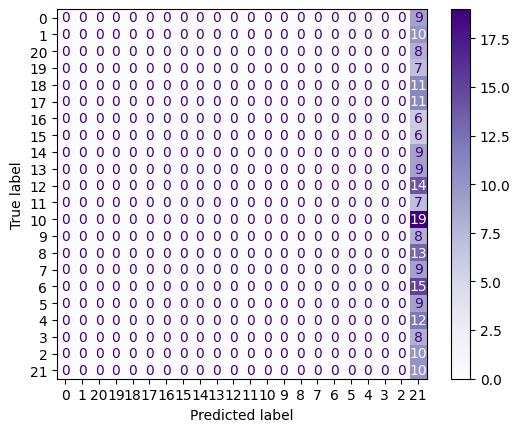

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Testing Process : 0.13413262367248535 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       

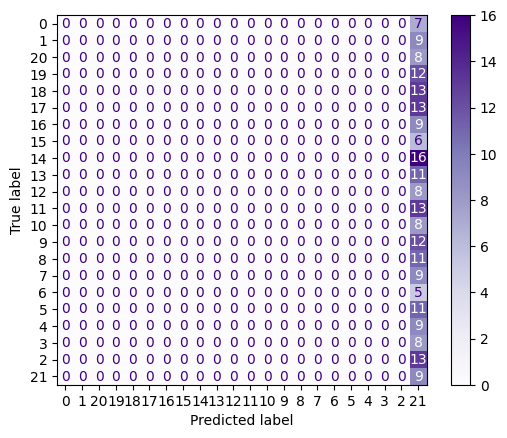

In [86]:
from tensorflow.keras.optimizers import Adamax as crs_adamax

crs_time_1 = crs_time.time()

inp_layer = crs_input(shape=(crs_Xtrain.shape[1],))

inp_reshaped = crs_reshape((crs_Xtrain.shape[1], 1))(inp_layer)

attention_layer = crs_TFlow.keras.layers.Attention()([inp_reshaped, inp_reshaped])

attention_reshaped = crs_reshape((-1, crs_Xtrain.shape[1]))(attention_layer)

global_avg_pooling = crs_GAPooling()(attention_reshaped)

out_layer = crs_dense(crop_cn, activation='softmax')(global_avg_pooling)

crs_model = crs_Model(inputs=inp_layer,outputs=out_layer)

crs_model.compile(optimizer=crs_adamax(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_model.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time_2 = crs_time.time()
print("Training Process :", crs_time_2-crs_time_1, "Seconds\n")

#  Validation Process
crs_time_1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xval)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Yval, crs_y_pdct))

crs_confM = crs_confusM(crs_Yval, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()
#  Testing Process

crs_time_1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Ytest, crs_y_pdct))

crs_confM = crs_confusM(crs_Ytest, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Transformer model with RMSprop Optimizer**

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.0499 - loss: 164.9791 - val_accuracy: 0.0318 - val_loss: 293.8166
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0487 - loss: 250.3483 - val_accuracy: 0.0409 - val_loss: 316.9268
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0514 - loss: 317.0172 - val_accuracy: 0.0455 - val_loss: 493.6022
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0484 - loss: 494.1358 - val_accuracy: 0.0455 - val_loss: 691.1057
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0472 - loss: 665.7074 - val_accuracy: 0.0455 - val_loss: 620.7570
Training Process : 1.9282376766204834 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Process : 0.22337913513183594 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.05      1.00      0.09        10
           2       0.00      0.00      0.00         8
       

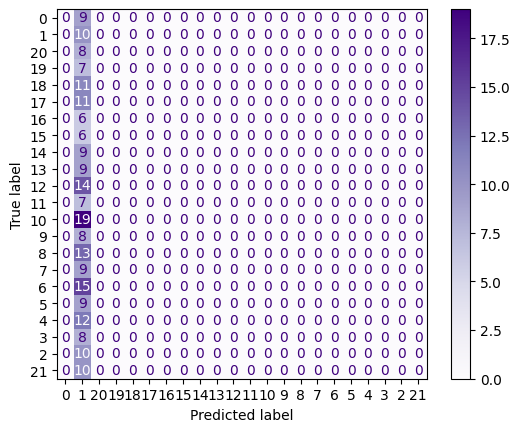

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Testing Process : 0.20876026153564453 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.04      1.00      0.08         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       

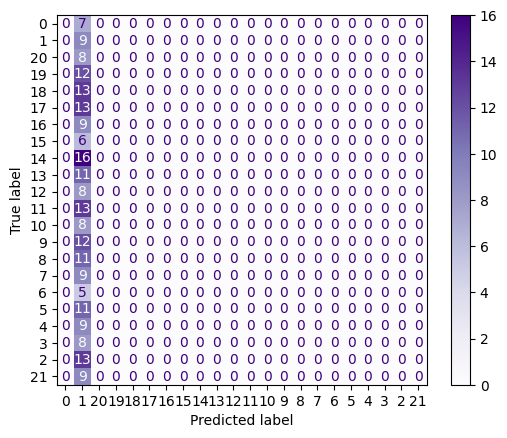

In [31]:
from tensorflow.keras.optimizers import RMSprop as crs_rmsprop

crs_time1 = crs_time.time()

inp_layer = crs_input(shape=(crs_Xtrain.shape[1],))
inp_reshaped = crs_reshape((crs_Xtrain.shape[1], 1))(inp_layer)

attention_layer = crs_TFlow.keras.layers.Attention()([inp_reshaped, inp_reshaped])

attention_reshaped= crs_reshape((-1, crs_Xtrain.shape[1]))(attention_layer)

global_avg_pooling = crs_GAPooling()(attention_reshaped)

out_layer = crs_dense(crop_cn, activation='softmax')(global_avg_pooling)

crs_model = crs_Model(inputs=inp_layer, outputs=out_layer)

crs_model.compile(optimizer=crs_rmsprop(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_model.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

#  Validation Process
crs_time_1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xval)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Yval, crs_y_pdct))

crs_confM = crs_confusM(crs_Yval, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

# Testing Process

crs_time_1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Ytest, crs_y_pdct))

crs_confM = crs_confusM(crs_Ytest, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

### **Transformer model with SGD Optimizer**

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.0452 - loss: 713.1990 - val_accuracy: 0.0364 - val_loss: 3391.9519
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0433 - loss: 3873.8884 - val_accuracy: 0.0545 - val_loss: 5333.5029
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0369 - loss: 5397.4023 - val_accuracy: 0.0364 - val_loss: 5307.0903
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0459 - loss: 5648.1367 - val_accuracy: 0.0455 - val_loss: 5379.7539
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0489 - loss: 5711.6123 - val_accuracy: 0.0455 - val_loss: 5951.6333
Training Process : 2.310155153274536 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Validation Process : 0.7519538402557373 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8


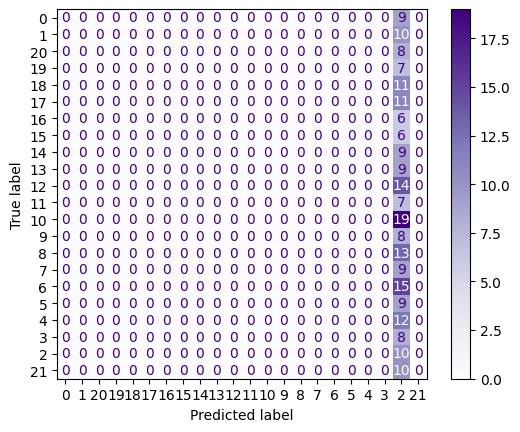

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Testing Process : 0.1587052345275879 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        

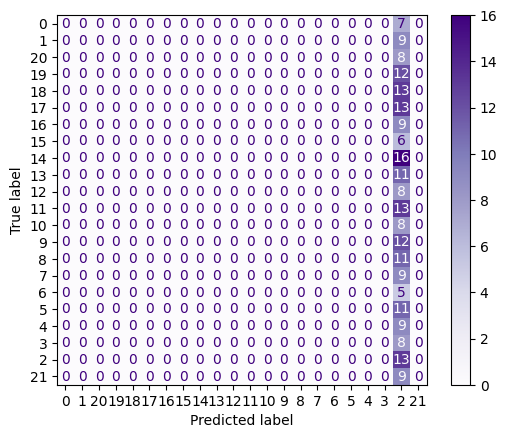

In [88]:
from tensorflow.keras.optimizers import SGD as crs_sgd

crs_time1 = crs_time.time()

inp_layer = crs_input(shape=(crs_Xtrain.shape[1],))

inp_reshaped = crs_reshape((crs_Xtrain.shape[1], 1))(inp_layer)

attention_layer = crs_TFlow.keras.layers.Attention()([inp_reshaped, inp_reshaped])

attention_reshaped = crs_reshape((-1, crs_Xtrain.shape[1]))(attention_layer)

global_avg_pooling = crs_GAPooling()(attention_reshaped)

out_layer = crs_dense(crop_cn, activation='softmax')(global_avg_pooling)

crs_model = crs_Model(inputs=inp_layer, outputs=out_layer)

crs_model.compile(optimizer=crs_sgd(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_model.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

#  Validation Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xval)
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Yval, crs_y_pdct))

crs_confM = crs_confusM(crs_Yval, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

# Testing Process

crs_time1 = crs_time.time()
crs_y_pdct = crs_model.predict(crs_Xtest)
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crs_y_pdct = crs_np.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rep(crs_Ytest, crs_y_pdct))

crs_confM = crs_confusM(crs_Ytest, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()